In [67]:
import  script

In [68]:
engine=script.create_conn()
cleaned_data=script.fetch_data(engine, "xdr_cleaned_data")

Connection successful


In [78]:
cleaned_data.columns


Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Extract relevant columns for engagement metrics
engagement_metrics = cleaned_data[['MSISDN/Number', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']]

#  Aggregate the metrics per customer ID and report the top 10 customers
agg_engagement = engagement_metrics.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()


agg_engagement['Total Engagement'] = agg_engagement['Dur. (ms)'] + agg_engagement['Total UL (Bytes)'] + agg_engagement['Total DL (Bytes)']


top_10_customers = agg_engagement.sort_values('Total Engagement', ascending=False).head(10)



In [22]:
top_10_customers

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Engagement
106853,4.188282e+10,7.255100e+07,4.436642e+10,4.873783e+11,5.318173e+11
6437,3.361489e+10,9.966898e+06,6.894830e+08,8.156743e+09,8.856193e+09
92923,3.376054e+10,9.279434e+06,7.034786e+08,7.811295e+09,8.524053e+09
13180,3.362578e+10,1.855375e+07,7.295774e+08,7.770043e+09,8.518174e+09
13526,3.362632e+10,8.791927e+06,6.696507e+08,7.301517e+09,7.979959e+09
76363,3.367588e+10,4.865947e+06,5.815688e+08,7.309542e+09,7.895977e+09
37052,3.365973e+10,4.035428e+06,6.242603e+08,7.081602e+09,7.709898e+09
63028,3.366646e+10,4.536757e+06,4.050610e+08,6.903440e+09,7.313038e+09
92577,3.376041e+10,5.321667e+06,5.215189e+08,6.610852e+09,7.137692e+09
57241,3.366471e+10,2.927785e+06,4.712445e+08,6.400774e+09,6.874946e+09


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


cluster_data = agg_engagement[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']]

# Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_data)




# Run K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
agg_engagement['Cluster'] = kmeans.fit_predict(normalized_data)


cluster_summary = agg_engagement.groupby('Cluster').agg({
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()





/home/abrham/Desktop/10x/week-1/Week-1-User-Analytics-in-the-Telecommunication-Industry/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
cluster_summary

Cluster   Dur. (ms)                                       Total UL (Bytes)  \
                  min         max        mean           sum              min   
0       0   -0.482627    0.909609   -0.107784 -10695.199631        -0.391394   
1       1  250.132483  250.132483  250.132483    250.132483       316.132823   
2       2    0.082343   63.589798    1.369306  10445.067148        -0.348370   

                                       Total DL (Bytes)              \
          max        mean          sum              min         max   
0    1.259136   -0.045600 -4524.827877        -0.403502    1.563766   
1  316.132823  316.132823   316.132823       312.054001  312.054001   
2    4.793525    0.551743  4208.695054        -0.396951    4.820210   

                            
         mean          sum  
0   -0.046615 -4625.561387  
1  312.054001   312.054001  
2    0.565483  4313.507386

In [80]:
import pandas as pd



# Step 1: Create a new column for total traffic per application
cleaned_data['Social Media Traffic'] = cleaned_data['Social Media DL (Bytes)'] + cleaned_data['Social Media UL (Bytes)']
cleaned_data['Google Traffic'] = cleaned_data['Google DL (Bytes)'] + cleaned_data['Google UL (Bytes)']
cleaned_data['Email Traffic'] = cleaned_data['Email DL (Bytes)'] + cleaned_data['Email UL (Bytes)']
cleaned_data['Youtube Traffic'] = cleaned_data['Youtube DL (Bytes)'] + cleaned_data['Youtube UL (Bytes)']
cleaned_data['Netflix Traffic'] = cleaned_data['Netflix DL (Bytes)'] + cleaned_data['Netflix UL (Bytes)']
cleaned_data['Gaming Traffic'] = cleaned_data['Gaming DL (Bytes)'] + cleaned_data['Gaming UL (Bytes)']
cleaned_data['Other Traffic'] = cleaned_data['Other DL (Bytes)'] + cleaned_data['Other UL (Bytes)']

#  Group by 'MSISDN/Number' and find the sum of total traffic for each application
agg_user_app_traffic = cleaned_data.groupby('MSISDN/Number')[['Social Media Traffic', 'Google Traffic', 'Email Traffic',
                                                   'Youtube Traffic', 'Netflix Traffic', 'Gaming Traffic', 'Other Traffic']].sum().reset_index()

#  Find the top 10 most engaged users per application
top_10_social_media_users = agg_user_app_traffic.nlargest(10, 'Social Media Traffic')
top_10_google_users = agg_user_app_traffic.nlargest(10, 'Google Traffic')
top_10_email_users = agg_user_app_traffic.nlargest(10, 'Email Traffic')
top_10_youtube_users = agg_user_app_traffic.nlargest(10, 'Youtube Traffic')
top_10_netflix_users = agg_user_app_traffic.nlargest(10, 'Netflix Traffic')
top_10_gaming_users = agg_user_app_traffic.nlargest(10, 'Gaming Traffic')
top_10_other_users = agg_user_app_traffic.nlargest(10, 'Other Traffic')




In [82]:
top_10_social_media_users
 

,MSISDN/Number,Social Media Traffic,Google Traffic,Email Traffic,Youtube Traffic,Netflix Traffic,Gaming Traffic,Other Traffic
106853,4.188282e+10,1.973817e+09,8.248577e+09,2.399880e+09,2.434073e+10,2.425357e+10,4.614780e+11,4.509784e+11
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
37052,3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09
106137,3.378632e+10,2.397492e+07,1.102545e+08,3.631012e+07,2.147639e+08,3.059398e+08,4.851096e+09,4.252487e+09
76363,3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
94654,3.376127e+10,1.449608e+07,9.708999e+07,2.075372e+07,2.727896e+08,2.920913e+08,4.274099e+09,5.077779e+09


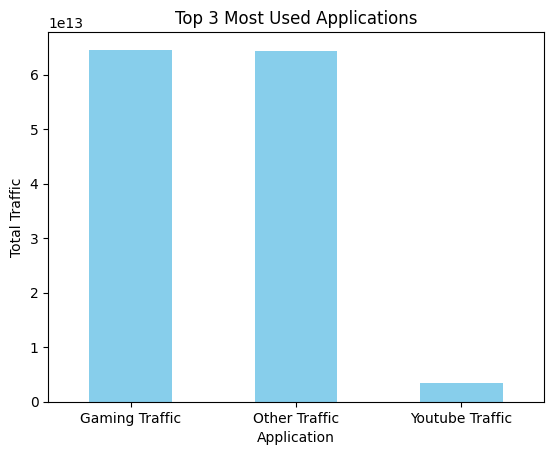

In [84]:
# Find the top 3 most used applications
top_3_apps = agg_user_app_traffic[['Social Media Traffic', 'Google Traffic', 'Email Traffic',
                                   'Youtube Traffic', 'Netflix Traffic', 'Gaming Traffic', 'Other Traffic']].sum().nlargest(3)

# Plot the bar chart
top_3_apps.plot(kind='bar', rot=0, color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.show()